## Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.options.display.float_format = '{:,.2f}'.format

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

### Importing dataset

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...,...
89192,89193,23996,15,32,25,Male,Other,340,662,3.91
89193,89194,20466,20,47,31,Male,Other,240,892,3.56
89194,89195,13655,16,97,25,Male,Student,270,462,4.23
89195,89196,24840,9,18,35,Male,Working Professional,230,819,3.77


In [3]:
df_test = pd.read_csv('test.csv')
df_test

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840
...,...,...,...,...,...,...,...,...,...
11116,100314,26336,25,140,21,Male,Student,240,317
11117,100315,6772,8,100,19,Female,Student,280,628
11118,100316,2042,16,98,22,Male,Student,270,462
11119,100317,24626,8,16,33,Male,Other,280,628


### Getting details from dataset

In [4]:
def details(df):
    sum_null_values = df.isnull().sum()
    percent_null_values = 100* (sum_null_values/len(df))
    data_type = df.dtypes
    unique_values = df.nunique()

    table = pd.concat([sum_null_values,percent_null_values,data_type,unique_values], axis=1)
    table_col = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return table_col

In [5]:
details(df_train)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
row_id,0,0.00,int64,89197
user_id,0,0.00,int64,27734
category_id,0,0.00,int64,47
video_id,0,0.00,int64,175
age,0,0.00,int64,58
gender,0,0.00,object,2
profession,0,0.00,object,3
followers,0,0.00,int64,17
views,0,0.00,int64,43
engagement_score,0,0.00,float64,229


In [6]:
details(df_test)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
row_id,0,0.00,int64,11121
user_id,0,0.00,int64,10384
category_id,0,0.00,int64,23
video_id,0,0.00,int64,128
age,0,0.00,int64,53
gender,0,0.00,object,2
profession,0,0.00,object,3
followers,0,0.00,int64,15
views,0,0.00,int64,21


#### We can see that there are no null values in dataset.

### Since use of row_id is not allowed to be part of model, let's drop it

In [7]:
train_df = df_train.copy()
train_df.drop(['row_id','user_id'],1,inplace=True)
train_df

,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,37,128,24,Male,Student,180,1000,4.33
1,32,132,14,Female,Student,330,714,1.79
2,12,24,19,Male,Student,180,138,4.35
3,23,112,19,Male,Student,220,613,3.77
4,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...
89192,15,32,25,Male,Other,340,662,3.91
89193,20,47,31,Male,Other,240,892,3.56
89194,16,97,25,Male,Student,270,462,4.23
89195,9,18,35,Male,Working Professional,230,819,3.77


In [8]:
test_df = df_test.copy()
test_df.drop(['row_id','user_id'],1,inplace=True)
test_df

,category_id,video_id,age,gender,profession,followers,views
0,12,42,14,Male,Student,180,138
1,34,115,14,Male,Student,230,840
2,8,110,44,Female,Working Professional,280,628
3,16,137,18,Male,Student,270,462
4,34,96,47,Female,Other,230,840
...,...,...,...,...,...,...,...
11116,25,140,21,Male,Student,240,317
11117,8,100,19,Female,Student,280,628
11118,16,98,22,Male,Student,270,462
11119,8,16,33,Male,Other,280,628


In [9]:
train_df.gender.value_counts()

Male      52397
Female    36800
Name: gender, dtype: int64

In [10]:
train_df.profession.value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

In [11]:
train_df[['category_id','video_id','age','followers','views','engagement_score']].describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,category_id,video_id,age,followers,views,engagement_score
count,"89,197.00","89,197.00","89,197.00","89,197.00","89,197.00","89,197.00"
mean,18.32,77.72,24.85,252.46,502.98,3.49
std,11.68,48.47,8.96,46.09,268.57,0.86
min,1.00,1.00,10.00,160.00,30.00,0.00
1%,1.00,1.00,11.00,160.00,44.00,1.09
5%,4.00,6.00,13.00,180.00,134.00,1.96
10%,5.00,12.00,14.00,180.00,138.00,2.24
25%,8.00,34.00,18.00,230.00,229.00,2.90
50%,16.00,76.00,23.00,240.00,467.00,3.71
75%,26.00,120.00,32.00,280.00,714.00,4.15


#### We do not see much outliers in dataset.

In [12]:
# train_df.drop(['category_id','video_id'],1,inplace=True)
# train_df

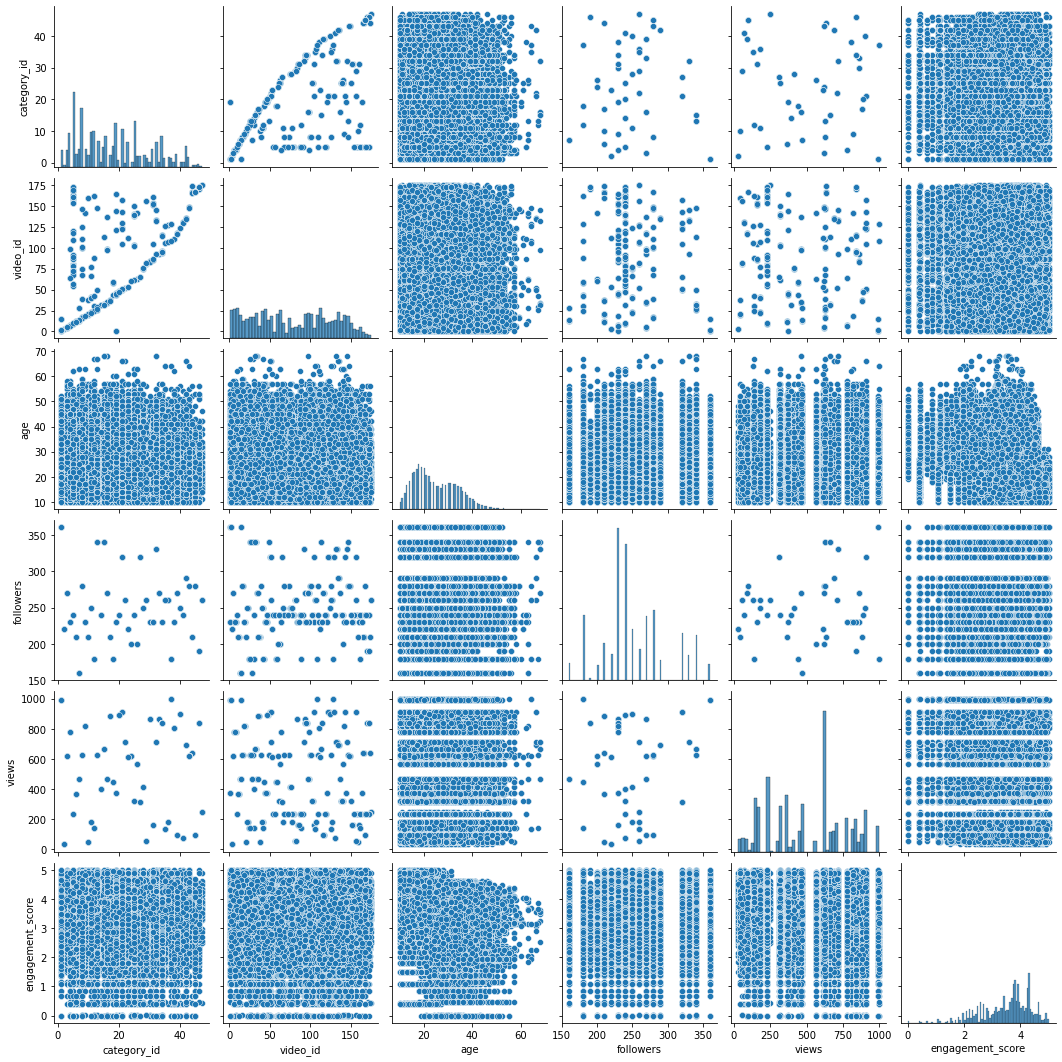

In [13]:
sns.pairplot(train_df)
plt.show()

## Outliers

In [14]:
train_df.columns

Index(['category_id', 'video_id', 'age', 'gender', 'profession', 'followers', 'views', 'engagement_score'], dtype='object')

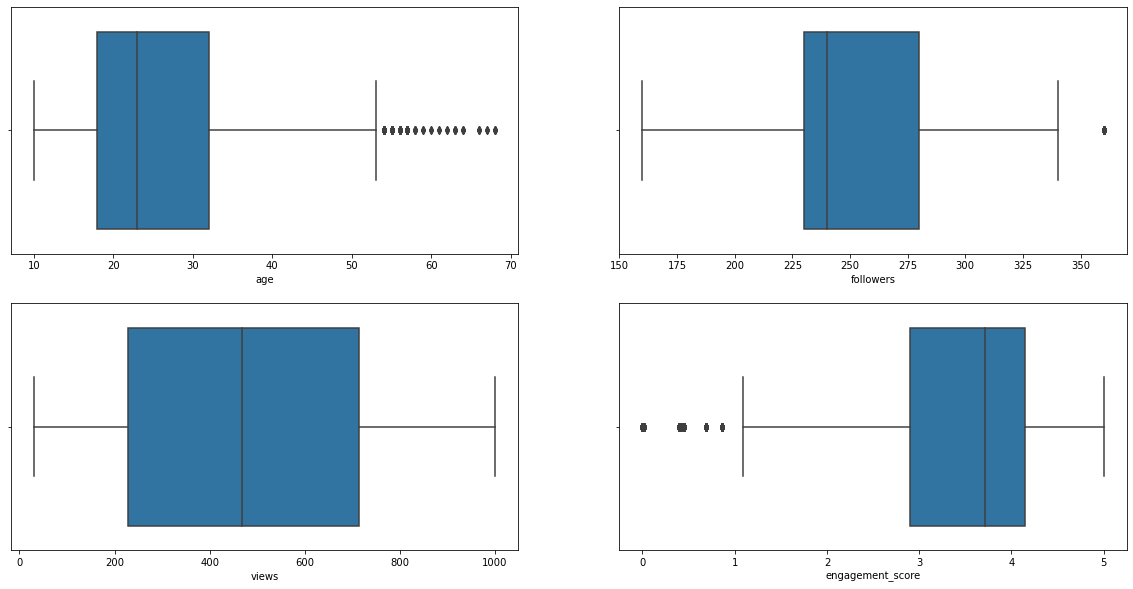

In [15]:
col_data = ['age','followers', 'views', 'engagement_score']

plt.figure(figsize=(20,10))
for i in enumerate(col_data):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(train_df[i[1]])

### Relationship between variables

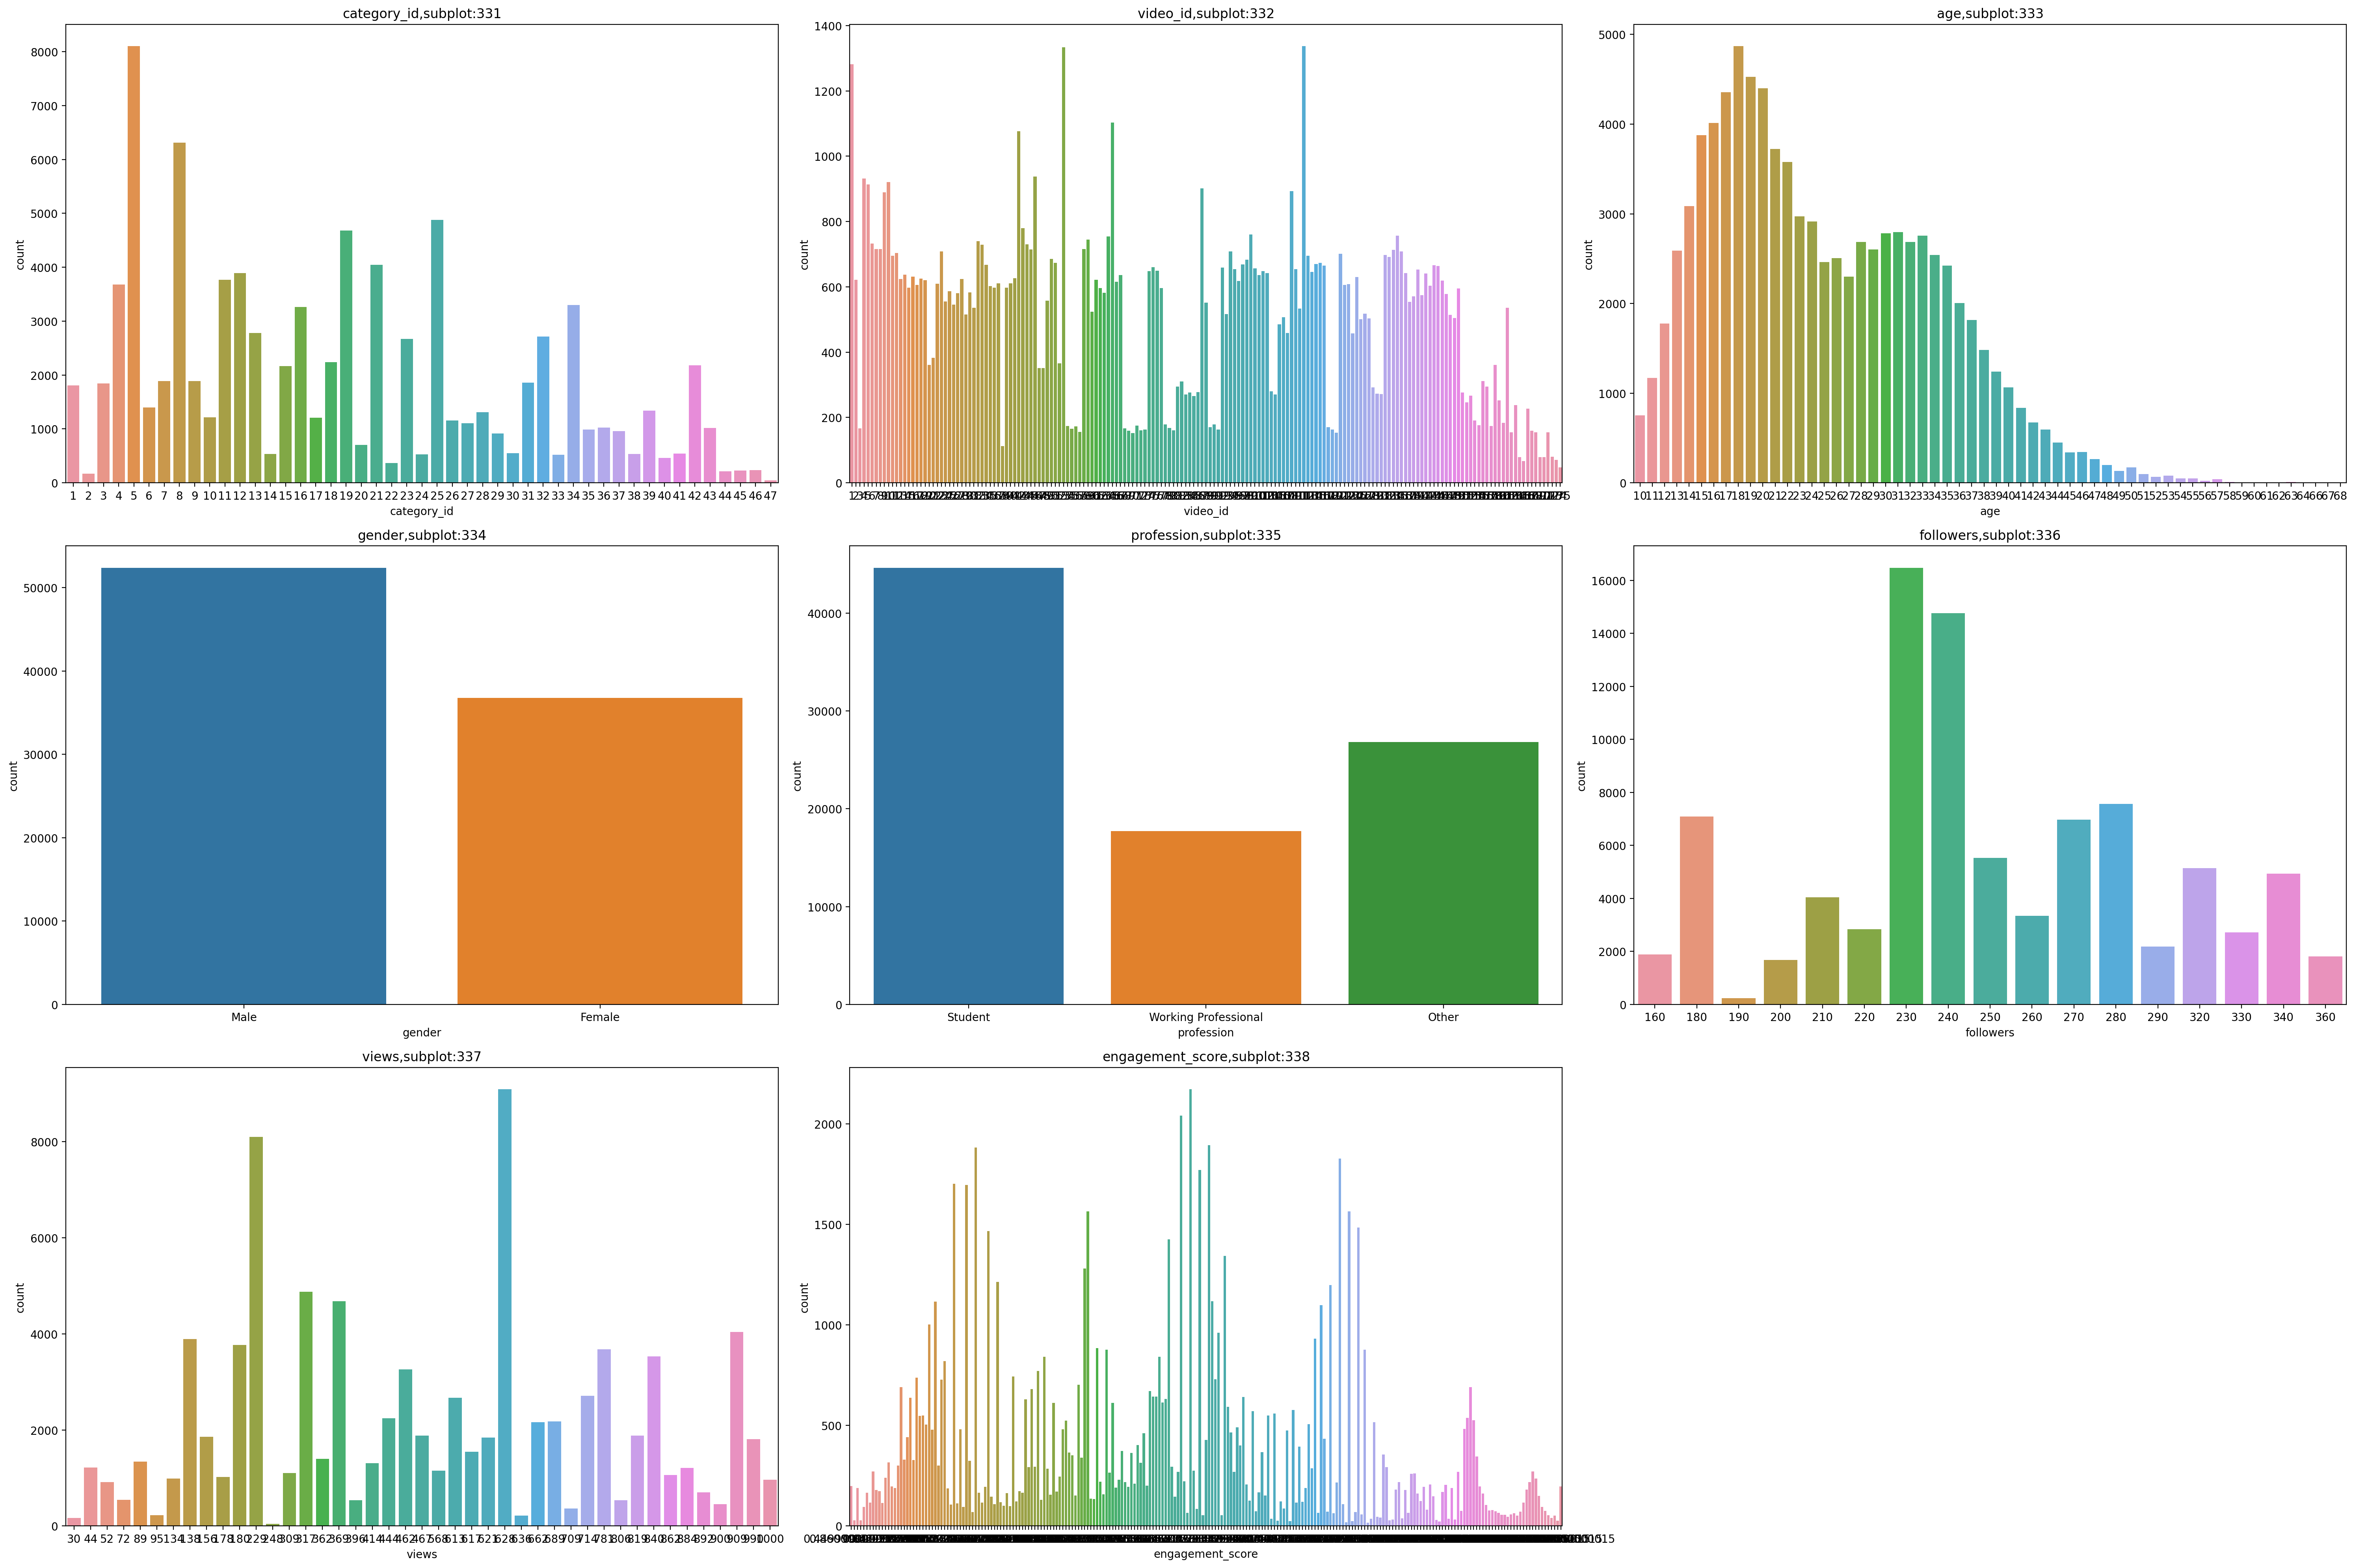

In [16]:
row,col,c = 3,3,1
fig = plt.figure(figsize=(30,20), dpi= 200)

for i in list(train_df):
    plt.subplot(row,col,c)
    plt.title(f'{i},subplot:{row}{col}{c}')
    plt.xlabel(i)
#     train_data[i].value_counts().plot.bar()
    ax = sns.countplot(x=train_df[i])
    c = c + 1
plt.tight_layout()
plt.show()

In [17]:
details(train_df)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
category_id,0,0.00,int64,47
video_id,0,0.00,int64,175
age,0,0.00,int64,58
gender,0,0.00,object,2
profession,0,0.00,object,3
followers,0,0.00,int64,17
views,0,0.00,int64,43
engagement_score,0,0.00,float64,229


## one hot encoding gender and profession

In [18]:
train_encode = train_df.copy()
train_encode

,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,37,128,24,Male,Student,180,1000,4.33
1,32,132,14,Female,Student,330,714,1.79
2,12,24,19,Male,Student,180,138,4.35
3,23,112,19,Male,Student,220,613,3.77
4,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...
89192,15,32,25,Male,Other,340,662,3.91
89193,20,47,31,Male,Other,240,892,3.56
89194,16,97,25,Male,Student,270,462,4.23
89195,9,18,35,Male,Working Professional,230,819,3.77


In [19]:
ohe = OneHotEncoder(sparse=False)

# For train data
ohe_df1 = pd.DataFrame(ohe.fit_transform(train_encode[['gender','profession']]),columns=ohe.get_feature_names())
train_encode = pd.concat([train_encode, ohe_df1],1)
train_encode

,category_id,video_id,age,gender,profession,followers,views,engagement_score,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional
0,37,128,24,Male,Student,180,1000,4.33,0.00,1.00,0.00,1.00,0.00
1,32,132,14,Female,Student,330,714,1.79,1.00,0.00,0.00,1.00,0.00
2,12,24,19,Male,Student,180,138,4.35,0.00,1.00,0.00,1.00,0.00
3,23,112,19,Male,Student,220,613,3.77,0.00,1.00,0.00,1.00,0.00
4,23,112,27,Male,Working Professional,220,613,3.13,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89192,15,32,25,Male,Other,340,662,3.91,0.00,1.00,1.00,0.00,0.00
89193,20,47,31,Male,Other,240,892,3.56,0.00,1.00,1.00,0.00,0.00
89194,16,97,25,Male,Student,270,462,4.23,0.00,1.00,0.00,1.00,0.00
89195,9,18,35,Male,Working Professional,230,819,3.77,0.00,1.00,0.00,0.00,1.00


In [20]:
test_encode = test_df.copy()
test_encode

,category_id,video_id,age,gender,profession,followers,views
0,12,42,14,Male,Student,180,138
1,34,115,14,Male,Student,230,840
2,8,110,44,Female,Working Professional,280,628
3,16,137,18,Male,Student,270,462
4,34,96,47,Female,Other,230,840
...,...,...,...,...,...,...,...
11116,25,140,21,Male,Student,240,317
11117,8,100,19,Female,Student,280,628
11118,16,98,22,Male,Student,270,462
11119,8,16,33,Male,Other,280,628


In [21]:
ohe_df2 = pd.DataFrame(ohe.transform(test_encode[['gender','profession']]),columns=ohe.get_feature_names())
test_encode = pd.concat([test_encode, ohe_df2],1)
test_encode.drop(['gender','profession'],1,inplace=True)
test_encode

,category_id,video_id,age,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional
0,12,42,14,180,138,0.00,1.00,0.00,1.00,0.00
1,34,115,14,230,840,0.00,1.00,0.00,1.00,0.00
2,8,110,44,280,628,1.00,0.00,0.00,0.00,1.00
3,16,137,18,270,462,0.00,1.00,0.00,1.00,0.00
4,34,96,47,230,840,1.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
11116,25,140,21,240,317,0.00,1.00,0.00,1.00,0.00
11117,8,100,19,280,628,1.00,0.00,0.00,1.00,0.00
11118,16,98,22,270,462,0.00,1.00,0.00,1.00,0.00
11119,8,16,33,280,628,0.00,1.00,1.00,0.00,0.00


#### Converting object column into numerical column by onehot encoding to run machine learning algorithms.

## Approach 1

In [22]:
data_train1 = train_encode.copy()
data_train1.drop(['gender','profession'],1,inplace=True)
data_train1

,category_id,video_id,age,followers,views,engagement_score,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional
0,37,128,24,180,1000,4.33,0.00,1.00,0.00,1.00,0.00
1,32,132,14,330,714,1.79,1.00,0.00,0.00,1.00,0.00
2,12,24,19,180,138,4.35,0.00,1.00,0.00,1.00,0.00
3,23,112,19,220,613,3.77,0.00,1.00,0.00,1.00,0.00
4,23,112,27,220,613,3.13,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
89192,15,32,25,340,662,3.91,0.00,1.00,1.00,0.00,0.00
89193,20,47,31,240,892,3.56,0.00,1.00,1.00,0.00,0.00
89194,16,97,25,270,462,4.23,0.00,1.00,0.00,1.00,0.00
89195,9,18,35,230,819,3.77,0.00,1.00,0.00,0.00,1.00


### Heatmap

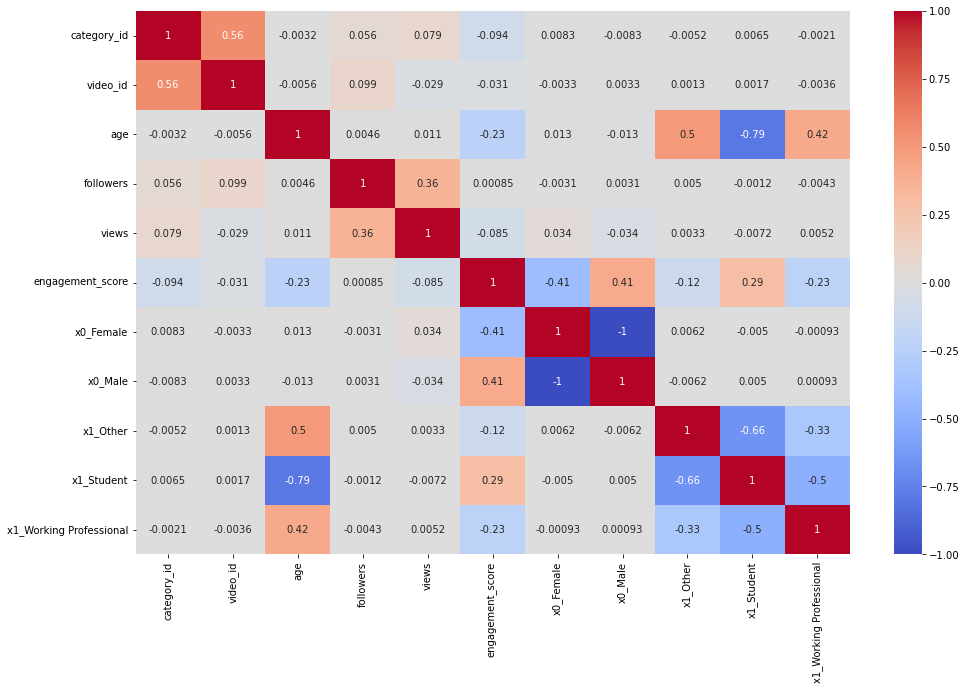

In [23]:
plt.figure(figsize = (16, 10))
sns.heatmap(data_train1.corr(), cmap="coolwarm", annot = True)
plt.show()

#### We do not see very high correlation between variables

### Relationship between variables

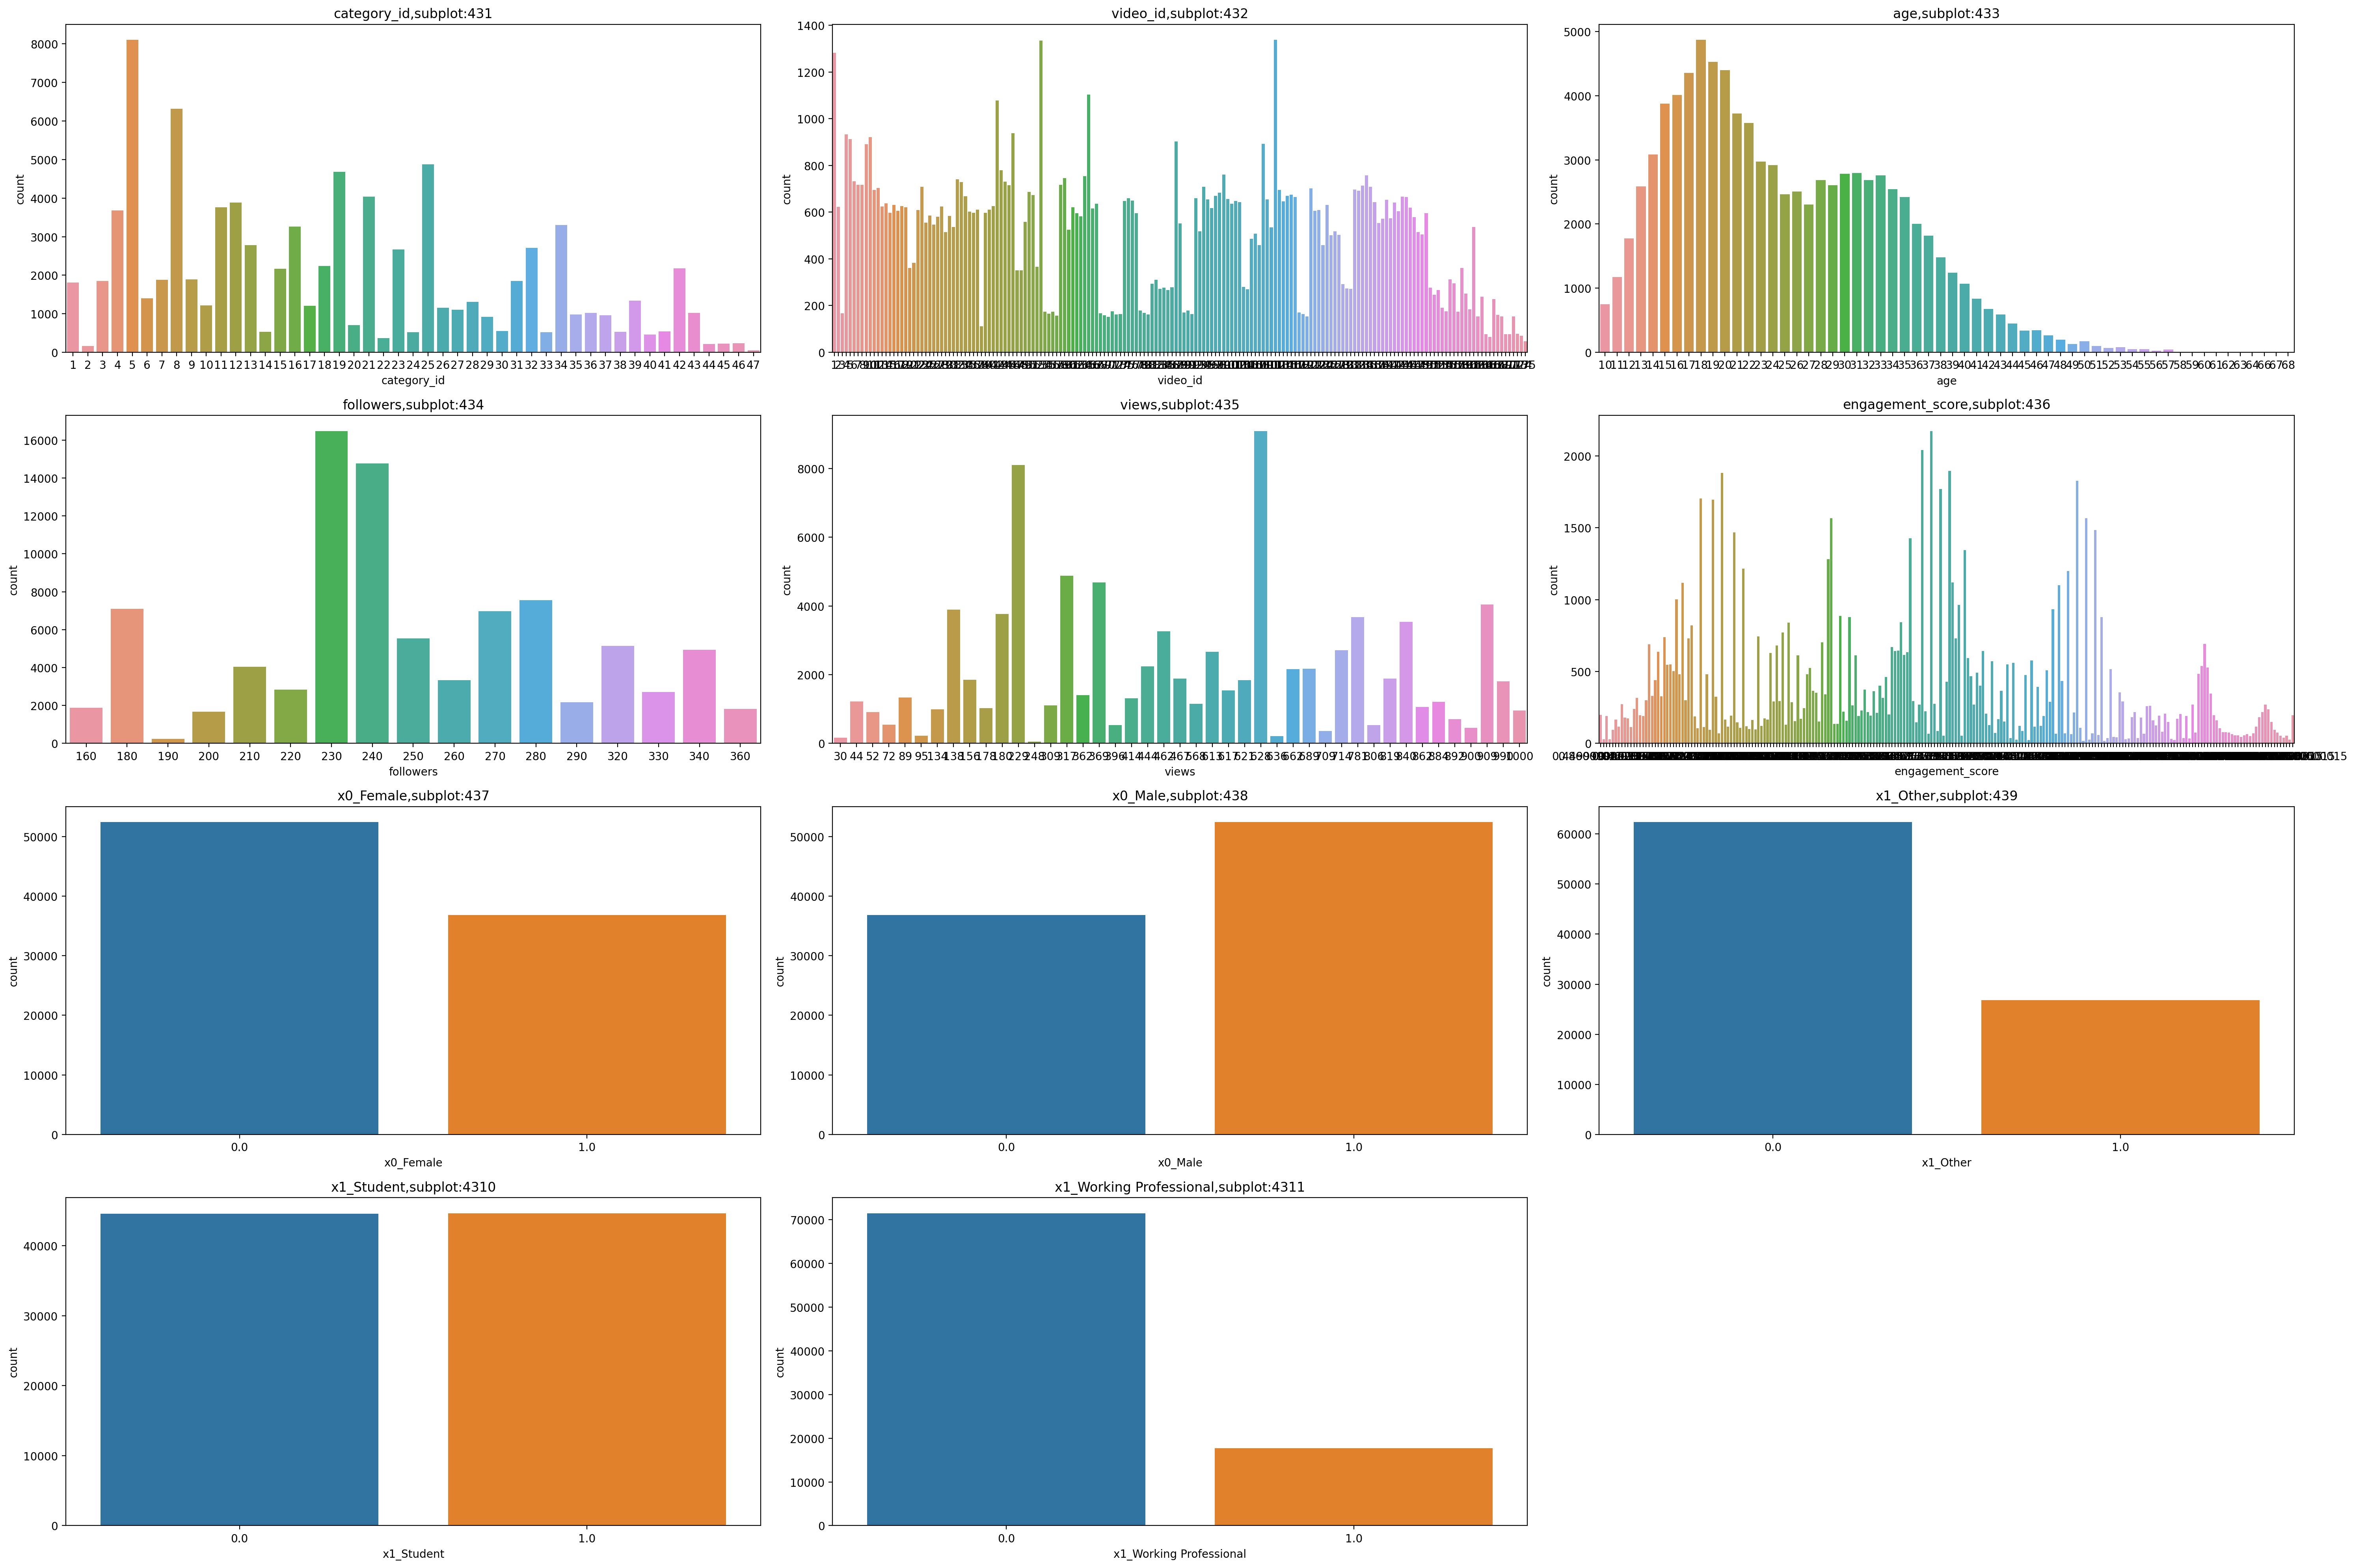

In [24]:
row,col,c = 4,3,1
fig = plt.figure(figsize=(30,20), dpi= 200)

for i in list(data_train1):
    plt.subplot(row,col,c)
    plt.title(f'{i},subplot:{row}{col}{c}')
    plt.xlabel(i)
#     train_data[i].value_counts().plot.bar()
    ax = sns.countplot(x=data_train1[i])
    c = c + 1
plt.tight_layout()
plt.show()

### Spltting data into train, test and validation set

In [25]:
X1 = data_train1.drop(['engagement_score'],1)
y1 = data_train1['engagement_score']

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X1, y1, train_size=0.7, random_state=23, stratify=y1)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((62437, 10), (62437,), (26760, 10), (26760,))

In [27]:
X_train

,category_id,video_id,age,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional
77139,3,5,23,270,621,0.00,1.00,0.00,1.00,0.00
5736,31,86,38,230,156,1.00,0.00,0.00,0.00,1.00
76489,29,156,15,260,52,0.00,1.00,0.00,1.00,0.00
40929,25,102,21,240,317,1.00,0.00,0.00,1.00,0.00
43110,6,11,38,210,362,0.00,1.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
23809,3,5,36,270,621,0.00,1.00,0.00,0.00,1.00
53355,5,172,27,240,229,0.00,1.00,0.00,0.00,1.00
62127,4,8,24,230,781,0.00,1.00,1.00,0.00,0.00
77843,46,173,21,190,840,0.00,1.00,0.00,1.00,0.00


In [28]:
X_valid

,category_id,video_id,age,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional
48644,4,99,23,230,781,0.00,1.00,0.00,0.00,1.00
81344,10,159,36,210,44,1.00,0.00,1.00,0.00,0.00
36704,12,42,35,180,138,0.00,1.00,0.00,0.00,1.00
4379,8,100,16,280,628,0.00,1.00,0.00,1.00,0.00
5974,16,97,33,270,462,0.00,1.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
24703,5,10,25,240,229,0.00,1.00,0.00,0.00,1.00
72990,5,10,22,240,229,1.00,0.00,0.00,1.00,0.00
6493,31,160,14,230,156,1.00,0.00,0.00,1.00,0.00
56514,9,19,15,230,819,0.00,1.00,0.00,1.00,0.00


In [29]:
y_train

77139   3.77
5736    3.65
76489   4.59
40929   3.49
43110   2.08
        ... 
23809   3.23
53355   3.13
62127   3.40
77843   3.58
82372   3.80
Name: engagement_score, Length: 62437, dtype: float64

### Preparing for running ML algorithms

In [30]:
model = list()
resample = list()
r2score_train = list()
r2score_valid = list()
adjusted_r_squared_train = list()
adjusted_r_squared_valid = list()

### Running Linear Regression, Decision Trees and Random Forest on the dataset

In [31]:
model_LR = LinearRegression()
model_DT = DecisionTreeRegressor(random_state = 23)
model_RF = RandomForestRegressor(oob_score = True, random_state=23)

#### Hyperparameter Tuning parameters

In [32]:
# params_LR = {'C':np.logspace(-1, 5, 10), 'class_weight':[None,'balanced'], 'penalty':['l1','l2']}


params_DT = {
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200]
    # 'criterion': ["entropy"]
} 


# Not able to run hyperparameters for Random Forest because of crashing, hence choosing limited parameters
params_RF = {    
    'n_estimators': [50],
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200]
    # 'criterion': ["entropy"]
}

#### Without hyperparameter tuning

In [33]:
def model_fit_evaluation1(model_model, X_train, y_train, X_valid, y_valid, algo=None, sampling=None):
    
    lr = model_model.fit(X_train, y_train)

    # Train set prediction
    y_train_pred = lr.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)

    N_train = len(X_train)
    p_train = len(X_train.columns)
    a_train = (1-r2_train)
    b_train = (N_train-1) / (N_train-p_train-1)
    adj_rsquared_train = (1 - (a_train * b_train))

    # Test set prediction    
    y_valid_pred = lr.predict(X_valid)
    r2_valid = r2_score(y_valid, y_valid_pred)

    N_valid = len(X_valid)
    p_valid = len(X_valid.columns)
    a_valid = (1-r2_valid)
    b_valid = (N_valid-1) / (N_valid-p_valid-1)
    adj_rsquared_valid = (1 - (a_valid * b_valid))
    
    print('R-Squared_train')
    print('='*60)
    print(r2_train,"\n")
    print('R-Squared_valid')
    print('='*60)
    print(r2_valid,"\n")    
    print('Adjusted R-Squared_train')
    print('='*60)
    print(adj_rsquared_train,"\n")
    print('Adjusted R-Squared_valid')
    print('='*60)
    print(adj_rsquared_valid,"\n")    
    
    model.append(algo)
    resample.append(sampling)
    r2score_train.append(r2_train)
    r2score_valid.append(r2_valid)
    adjusted_r_squared_train.append(adj_rsquared_train) 
    adjusted_r_squared_valid.append(adj_rsquared_valid) 

#### With hyperparameter tuning

In [34]:
def model_fit_evaluation2(model_model, params, X_train, y_train, X_valid, y_valid, algo=None, sampling=None):
    
    rc = RandomizedSearchCV(model_model, params, cv=5, scoring='r2', n_jobs=-1, verbose=1, random_state=23)
    rcv = rc.fit(X_train, y_train)
    # rcv = rc.best_estimator_
    
    print('\n')
    print('get params: ', rcv.get_params())
    print('best estimator : ', rcv.best_estimator_)
    print('best parameters: ', rcv.best_params_)
    print('best score: ', rcv.best_score_)
    print('\n')

    # Train set prediction
    y_train_pred = (rcv.best_estimator_).predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)

    N_train = len(X_train)
    p_train = len(X_train.columns)
    a_train = (1-r2_train)
    b_train = (N_train-1) / (N_train-p_train-1)
    adj_rsquared_train = (1 - (a_train * b_train))

    # Test set prediction    
    y_valid_pred = (rcv.best_estimator_).predict(X_valid)
    r2_valid = r2_score(y_valid, y_valid_pred)

    N_valid = len(X_valid)
    p_valid = len(X_valid.columns)
    a_valid = (1-r2_valid)
    b_valid = (N_valid-1) / (N_valid-p_valid-1)
    adj_rsquared_valid = (1 - (a_valid * b_valid))
    
    print('R-Squared_train')
    print('='*60)
    print(r2_train,"\n")
    print('R-Squared_valid')
    print('='*60)
    print(r2_valid,"\n")    
    print('Adjusted R-Squared_train')
    print('='*60)
    print(adj_rsquared_train,"\n")
    print('Adjusted R-Squared_valid')
    print('='*60)
    print(adj_rsquared_valid,"\n")   
    
    model.append(algo)
    resample.append(sampling)
    r2score_train.append(r2_train)
    r2score_valid.append(r2_valid)
    adjusted_r_squared_train.append(adj_rsquared_train) 
    adjusted_r_squared_valid.append(adj_rsquared_valid) 

#### Linear Regression without hyperparameter tuning

In [35]:
model_fit_evaluation1(model_LR, X_train, y_train, X_valid, y_valid, 'Linear Regression', 'without HPT')

R-Squared_train
0.2746238690419417 

R-Squared_valid
0.2669368860141582 

Adjusted R-Squared_train
0.2745076712828416 

Adjusted R-Squared_valid
0.26666283348360165 



#### Decision Trees without hyperparameter tuning

In [36]:
model_fit_evaluation1(model_DT, X_train, y_train, X_valid, y_valid, 'Decision Tree', 'without HPT')

R-Squared_train
0.5623712759815207 

R-Squared_valid
0.11900030940424788 

Adjusted R-Squared_train
0.5623011723830171 

Adjusted R-Squared_valid
0.11867095141307227 



#### Decision Trees with hyperparameter tuning

In [37]:
model_fit_evaluation2(model_DT, params_DT, X_train, y_train, X_valid, y_valid, 'Decision Tree', 'with HPT')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


get params:  {'cv': 5, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 23, 'estimator__splitter': 'best', 'estimator': DecisionTreeRegressor(random_state=23), 'n_iter': 10, 'n_jobs': -1, 'param_distributions': {'max_depth': [10, 20, 50, 100, 200], 'min_samples_leaf': [10, 20, 50, 100, 200], 'min_samples_split': [10, 20, 50, 100, 200]}, 'pre_dispatch': '2*n_jobs', 'random_state': 23, 'refit': True, 'return_train_score': False, 'scoring': 'r2', 'verbose': 1}
best estimator :  DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=100,
                      random

#### Random Forest without hyperparameter tuning

In [38]:
model_fit_evaluation1(model_RF, X_train, y_train, X_valid, y_valid, 'Random Forest', 'without HPT')

R-Squared_train
0.5484578493006707 

R-Squared_valid
0.2187769308417824 

Adjusted R-Squared_train
0.5483855169150141 

Adjusted R-Squared_valid
0.21848487391660454 



#### Random Forest with hyperparameter tuning

In [39]:
model_fit_evaluation2(model_RF, params_RF, X_train, y_train, X_valid, y_valid, 'Random Forest', 'with HPT')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


get params:  {'cv': 5, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': True, 'estimator__random_state': 23, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(oob_score=True, random_state=23), 'n_iter': 10, 'n_jobs': -1, 'param_distributions': {'n_estimators': [50], 'max_depth': [10, 20, 50, 100, 200], 'min_samples_leaf': [10, 20, 50, 100, 200], 'min_samples_split': [10, 20, 50, 100, 200]}, 'pre_dispatch': '2*n_jobs', 'ran

### Model1 Comparision

In [40]:
eval_df1 = pd.DataFrame({'model': model, 'resample': resample, 'r2score_train': r2score_train, 'r2score_valid': r2score_valid, 'adjusted_r_squared_train': adjusted_r_squared_train, 'adjusted_r_squared_valid': adjusted_r_squared_valid})
eval_df1

,model,resample,r2score_train,r2score_valid,adjusted_r_squared_train,adjusted_r_squared_valid
0,Linear Regression,without HPT,0.27,0.27,0.27,0.27
1,Decision Tree,without HPT,0.56,0.12,0.56,0.12
2,Decision Tree,with HPT,0.37,0.34,0.37,0.34
3,Random Forest,without HPT,0.55,0.22,0.55,0.22
4,Random Forest,with HPT,0.40,0.35,0.40,0.35


#### We can see that, r2score for Random forest with hyperparameter tuning gives better correlation with adjusted rsquare.

### Running trained dataset on test dataset and Analysis

In [41]:
X1

,category_id,video_id,age,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional
0,37,128,24,180,1000,0.00,1.00,0.00,1.00,0.00
1,32,132,14,330,714,1.00,0.00,0.00,1.00,0.00
2,12,24,19,180,138,0.00,1.00,0.00,1.00,0.00
3,23,112,19,220,613,0.00,1.00,0.00,1.00,0.00
4,23,112,27,220,613,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...
89192,15,32,25,340,662,0.00,1.00,1.00,0.00,0.00
89193,20,47,31,240,892,0.00,1.00,1.00,0.00,0.00
89194,16,97,25,270,462,0.00,1.00,0.00,1.00,0.00
89195,9,18,35,230,819,0.00,1.00,0.00,0.00,1.00


In [42]:
test_encode

,category_id,video_id,age,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional
0,12,42,14,180,138,0.00,1.00,0.00,1.00,0.00
1,34,115,14,230,840,0.00,1.00,0.00,1.00,0.00
2,8,110,44,280,628,1.00,0.00,0.00,0.00,1.00
3,16,137,18,270,462,0.00,1.00,0.00,1.00,0.00
4,34,96,47,230,840,1.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
11116,25,140,21,240,317,0.00,1.00,0.00,1.00,0.00
11117,8,100,19,280,628,1.00,0.00,0.00,1.00,0.00
11118,16,98,22,270,462,0.00,1.00,0.00,1.00,0.00
11119,8,16,33,280,628,0.00,1.00,1.00,0.00,0.00


#### Since test dataset has to be matched with train data, lets encode the columns

In [43]:
X_test = test_encode.copy()

In [44]:
y1.shape

(89197,)

#### Since Random forest with hyperparameters gave good r2score, we can run the same on test data set

In [45]:
rc = RandomizedSearchCV(model_RF, params_RF, cv=5, scoring='r2', n_jobs=-1, verbose=1, random_state=23)
rcv = rc.fit(X1, y1)
# rcv = rc.best_estimator_
    
print('\n')
print('get params: ', rcv.get_params())
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('\n')

# Train set prediction
y_train_pred = (rcv.best_estimator_).predict(X1)
r2_train = r2_score(y1, y_train_pred)

N_train = len(X1)
p_train = len(X1.columns)
a_train = (1-r2_train)
b_train = (N_train-1) / (N_train-p_train-1)
adj_rsquared_train = (1 - (a_train * b_train))

# Test set prediction    
y_test_pred = (rcv.best_estimator_).predict(X_test)
# r2_valid = r2_score(y_valid, y_valid_pred)

# N_valid = len(X_valid)
# p_valid = len(X_valid.columns)
# a_valid = (1-r2_valid)
# b_valid = (N_valid-1) / (N_valid-p_valid-1)
# adj_rsquared_valid = (1 - (a_valid * b_valid))

print('R-Squared_train')
print('='*60)
print(r2_train,"\n")
print('Adjusted R-Squared_train')
print('='*60)
print(adj_rsquared_train,"\n")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


get params:  {'cv': 5, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': True, 'estimator__random_state': 23, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(oob_score=True, random_state=23), 'n_iter': 10, 'n_jobs': -1, 'param_distributions': {'n_estimators': [50], 'max_depth': [10, 20, 50, 100, 200], 'min_samples_leaf': [10, 20, 50, 100, 200], 'min_samples_split': [10, 20, 50, 100, 200]}, 'pre_dispatch': '2*n_jobs', 'ran

### Predecting on Test dataset

In [46]:
#Final prediction
predictions = y_test_pred

#set the output as a dataframe and convert to csv file named submission.csv
submission = pd.DataFrame({ 'row_id' : df_test['row_id'], 'engagement_score': predictions })
submission.shape

(11121, 2)

In [47]:
submission

,row_id,engagement_score
0,89198,4.09
1,89199,3.61
2,89200,2.79
3,89201,3.88
4,89202,2.42
...,...,...
11116,100314,3.90
11117,100315,3.43
11118,100316,3.92
11119,100317,3.78


In [48]:
submission.to_csv(r'C:\Users\getch\Documents\submission.csv', index = False)

## Approach 2

### Binning category_id, video_id, age

In [49]:
data_binned = train_encode.copy()
data_binned.drop(['gender','profession'],1,inplace=True)
data_binned

,category_id,video_id,age,followers,views,engagement_score,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional
0,37,128,24,180,1000,4.33,0.00,1.00,0.00,1.00,0.00
1,32,132,14,330,714,1.79,1.00,0.00,0.00,1.00,0.00
2,12,24,19,180,138,4.35,0.00,1.00,0.00,1.00,0.00
3,23,112,19,220,613,3.77,0.00,1.00,0.00,1.00,0.00
4,23,112,27,220,613,3.13,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
89192,15,32,25,340,662,3.91,0.00,1.00,1.00,0.00,0.00
89193,20,47,31,240,892,3.56,0.00,1.00,1.00,0.00,0.00
89194,16,97,25,270,462,4.23,0.00,1.00,0.00,1.00,0.00
89195,9,18,35,230,819,3.77,0.00,1.00,0.00,0.00,1.00


In [50]:
bins=[0,10,20,30,40,50]
cat_group=['<10','10-20','20-30','30-40','>40']
data_binned['cat_binned'] = pd.cut(data_binned['category_id'], bins, labels=cat_group)

In [51]:
bins=[0,25,50,75,100,125,150,175]
vid_group=['<25','25-50','50-75','75-100','100-125','125-150','>150']
data_binned['vid_binned'] = pd.cut(data_binned['video_id'], bins, labels=vid_group)

In [52]:
bins=[0,15,30,45,60,75]
age_group=['<15','15-30','30-45','45-60','>60']
data_binned['age_binned'] = pd.cut(data_binned['age'], bins, labels=age_group)

In [53]:
data_binned.drop(['category_id','video_id','age'],1,inplace=True)
data_binned

,followers,views,engagement_score,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional,cat_binned,vid_binned,age_binned
0,180,1000,4.33,0.00,1.00,0.00,1.00,0.00,30-40,125-150,15-30
1,330,714,1.79,1.00,0.00,0.00,1.00,0.00,30-40,125-150,<15
2,180,138,4.35,0.00,1.00,0.00,1.00,0.00,10-20,<25,15-30
3,220,613,3.77,0.00,1.00,0.00,1.00,0.00,20-30,100-125,15-30
4,220,613,3.13,0.00,1.00,0.00,0.00,1.00,20-30,100-125,15-30
...,...,...,...,...,...,...,...,...,...,...,...
89192,340,662,3.91,0.00,1.00,1.00,0.00,0.00,10-20,25-50,15-30
89193,240,892,3.56,0.00,1.00,1.00,0.00,0.00,10-20,25-50,30-45
89194,270,462,4.23,0.00,1.00,0.00,1.00,0.00,10-20,75-100,15-30
89195,230,819,3.77,0.00,1.00,0.00,0.00,1.00,<10,<25,30-45


### Relationship between variables

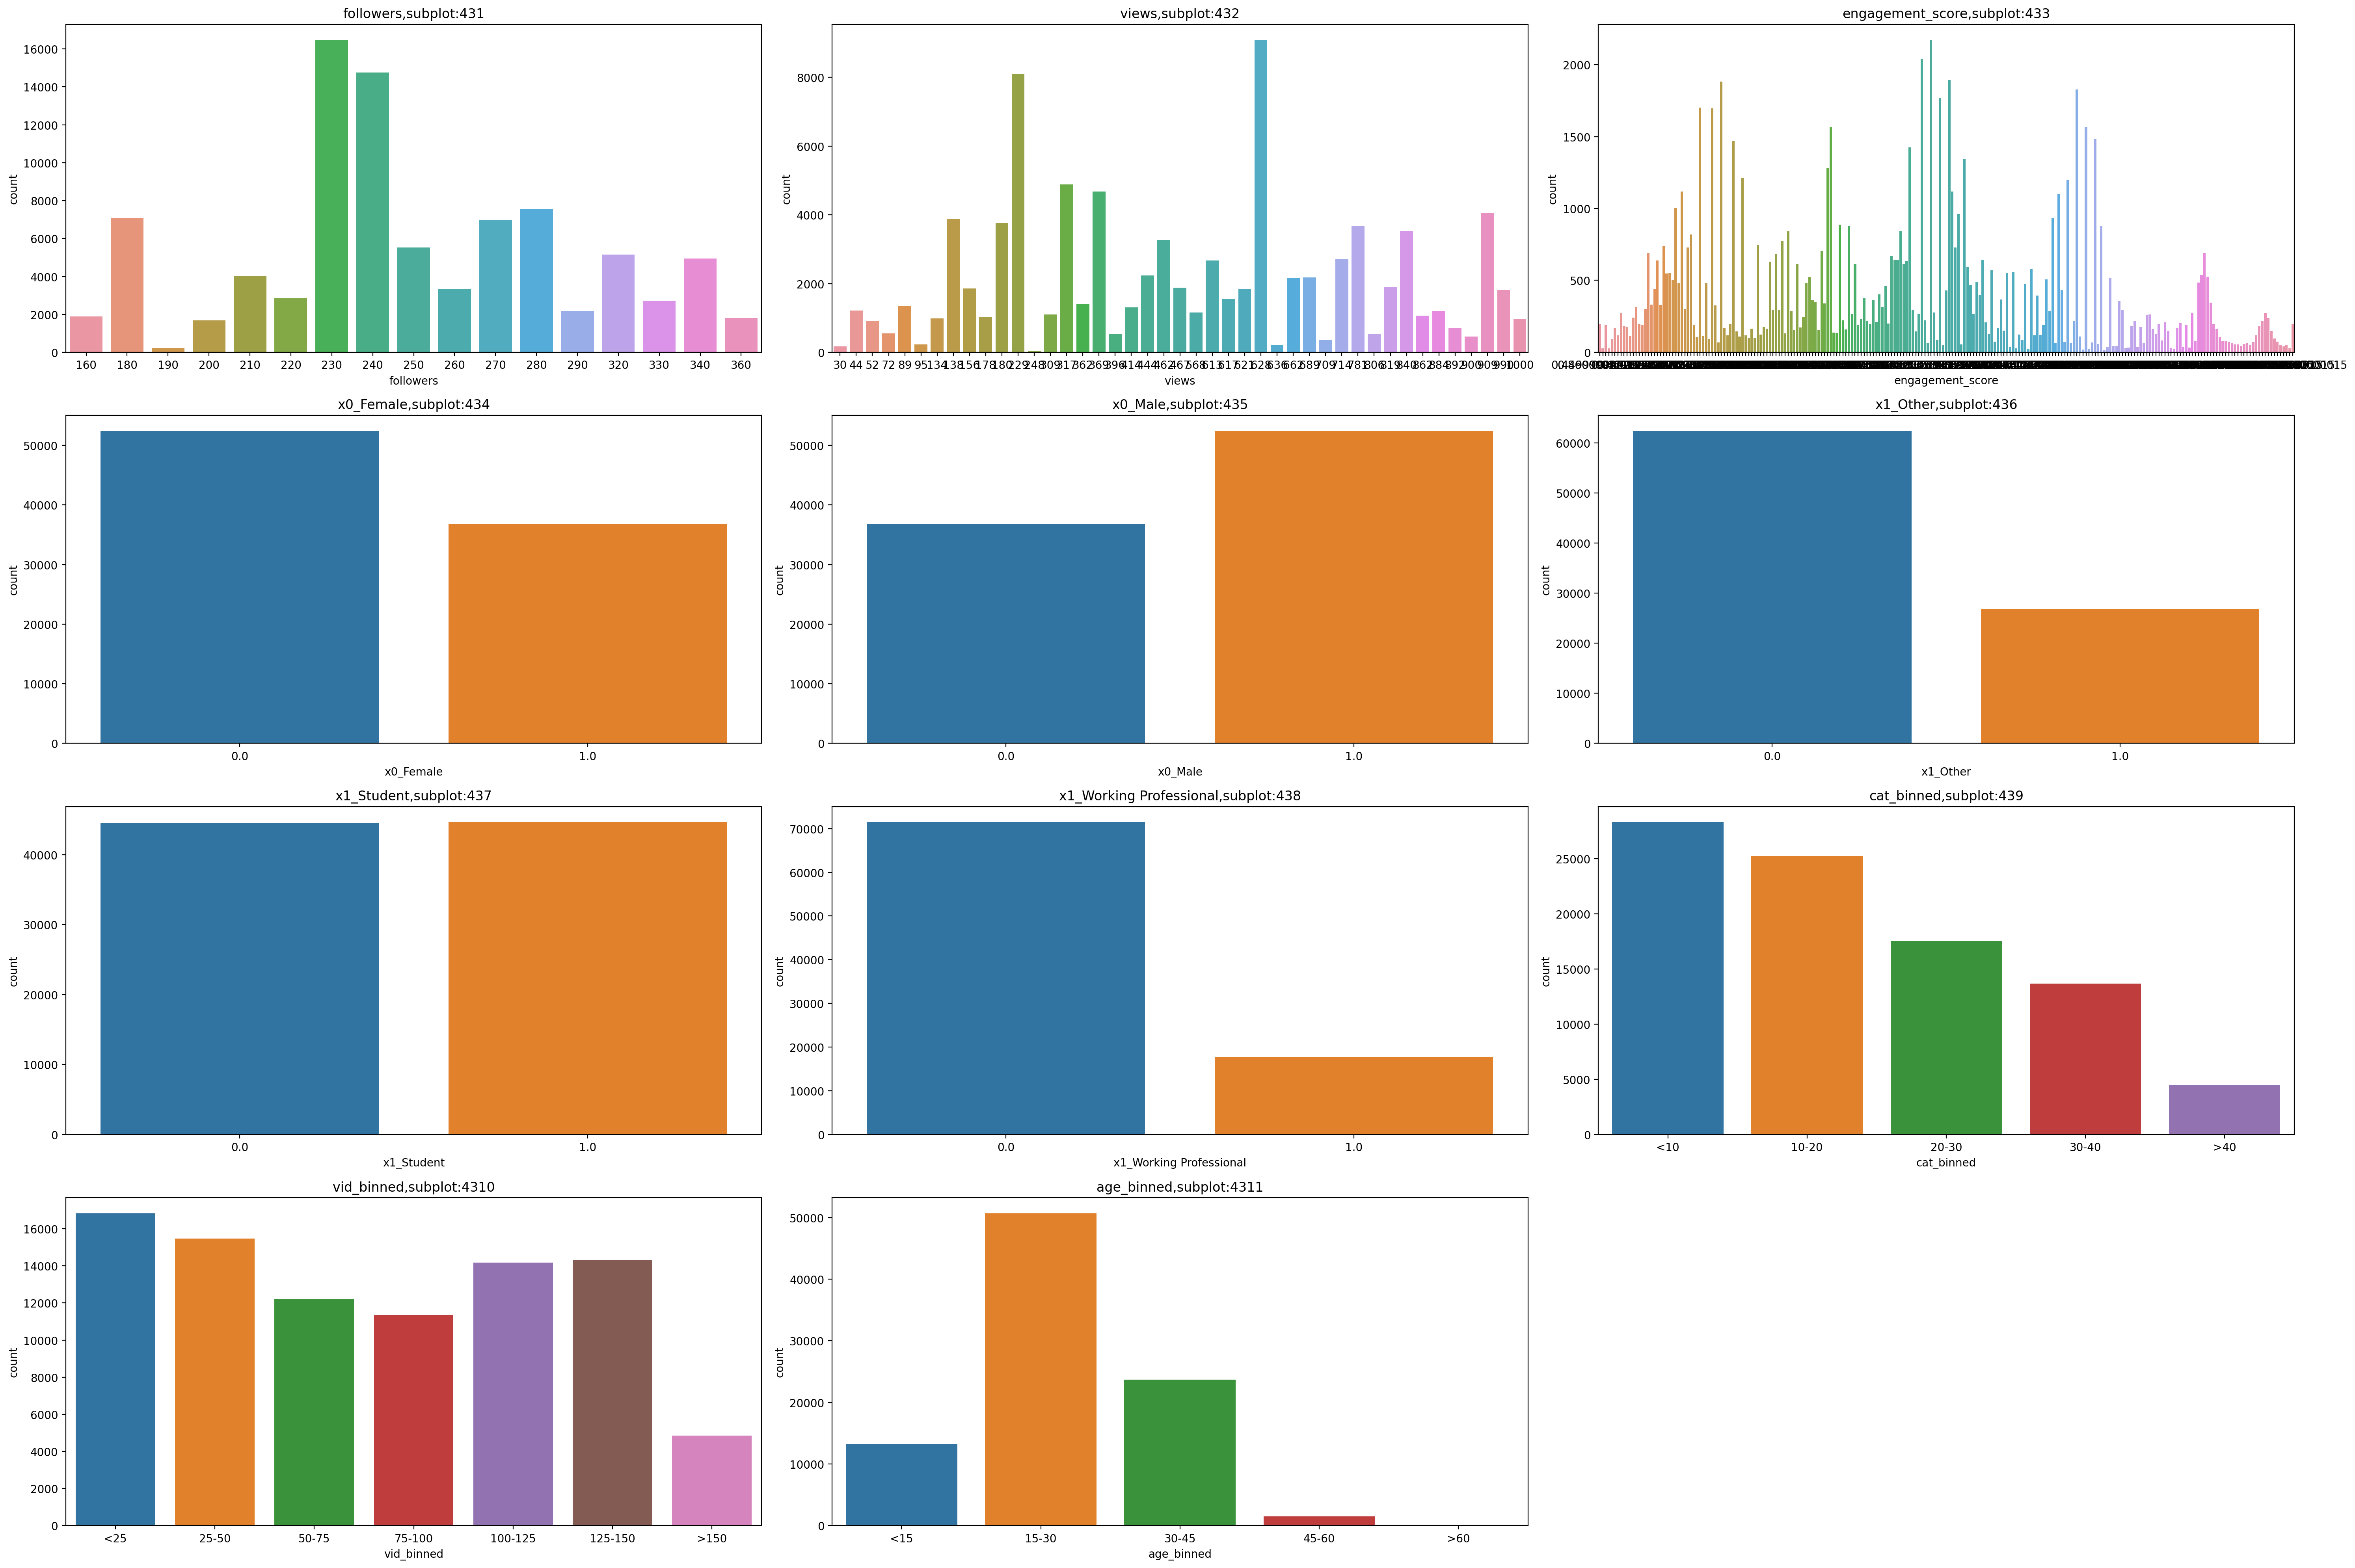

In [54]:
row,col,c = 4,3,1
fig = plt.figure(figsize=(30,20), dpi= 200)

for i in list(data_binned):
    plt.subplot(row,col,c)
    plt.title(f'{i},subplot:{row}{col}{c}')
    plt.xlabel(i)
#     train_data[i].value_counts().plot.bar()
    ax = sns.countplot(x=data_binned[i])
    c = c + 1
plt.tight_layout()
plt.show()

### Heatmap

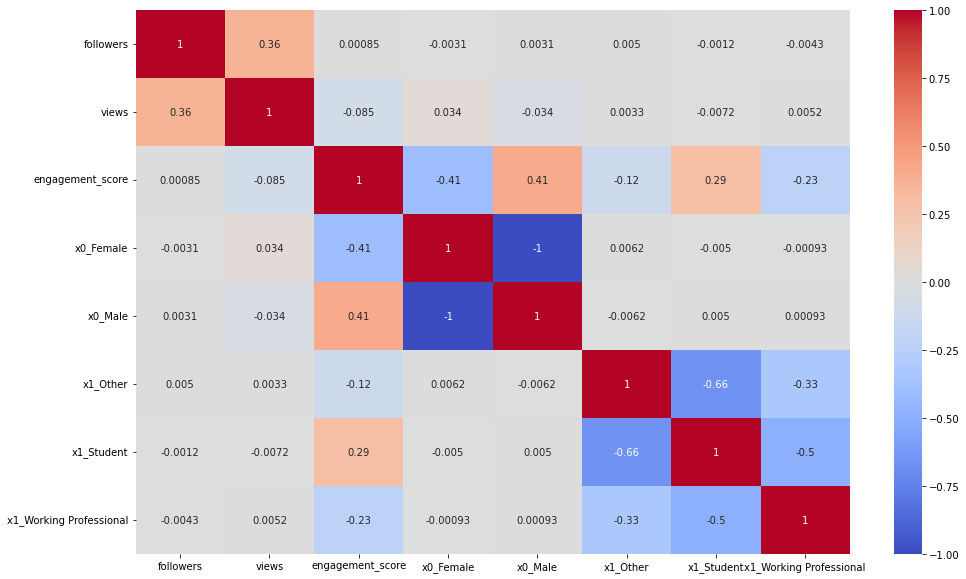

In [55]:
plt.figure(figsize = (16, 10))
sns.heatmap(data_binned.corr(), cmap="coolwarm", annot = True)
plt.show()

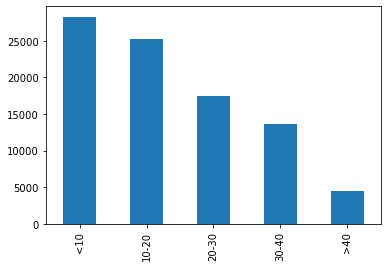

In [56]:
data_binned.cat_binned.value_counts(ascending=False).plot.bar()
plt.show()

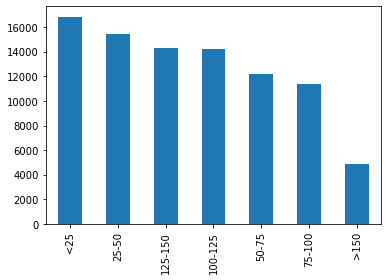

In [57]:
data_binned.vid_binned.value_counts(ascending=False).plot.bar()
plt.show()

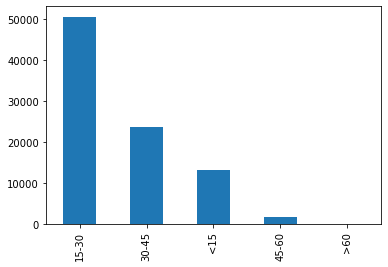

In [58]:
data_binned.age_binned.value_counts(ascending=False).plot.bar()
plt.show()

### Using frequency encoding to give precedence to higher counts wrt target variable

In [59]:
fe = data_binned.groupby('cat_binned').size()/len(data_binned)
fe

cat_binned
<10     0.32
10-20   0.28
20-30   0.20
30-40   0.15
>40     0.05
dtype: float64

In [60]:
data_binned.loc[:,'cat_encode'] = data_binned['cat_binned'].map(fe)
data_binned

,followers,views,engagement_score,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional,cat_binned,vid_binned,age_binned,cat_encode
0,180,1000,4.33,0.00,1.00,0.00,1.00,0.00,30-40,125-150,15-30,0.15
1,330,714,1.79,1.00,0.00,0.00,1.00,0.00,30-40,125-150,<15,0.15
2,180,138,4.35,0.00,1.00,0.00,1.00,0.00,10-20,<25,15-30,0.28
3,220,613,3.77,0.00,1.00,0.00,1.00,0.00,20-30,100-125,15-30,0.20
4,220,613,3.13,0.00,1.00,0.00,0.00,1.00,20-30,100-125,15-30,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...
89192,340,662,3.91,0.00,1.00,1.00,0.00,0.00,10-20,25-50,15-30,0.28
89193,240,892,3.56,0.00,1.00,1.00,0.00,0.00,10-20,25-50,30-45,0.28
89194,270,462,4.23,0.00,1.00,0.00,1.00,0.00,10-20,75-100,15-30,0.28
89195,230,819,3.77,0.00,1.00,0.00,0.00,1.00,<10,<25,30-45,0.32


In [61]:
fe = data_binned.groupby('vid_binned').size()/len(data_binned)
fe

vid_binned
<25       0.19
25-50     0.17
50-75     0.14
75-100    0.13
100-125   0.16
125-150   0.16
>150      0.05
dtype: float64

In [62]:
data_binned.loc[:,'vid_encode'] = data_binned['vid_binned'].map(fe)
data_binned

,followers,views,engagement_score,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional,cat_binned,vid_binned,age_binned,cat_encode,vid_encode
0,180,1000,4.33,0.00,1.00,0.00,1.00,0.00,30-40,125-150,15-30,0.15,0.16
1,330,714,1.79,1.00,0.00,0.00,1.00,0.00,30-40,125-150,<15,0.15,0.16
2,180,138,4.35,0.00,1.00,0.00,1.00,0.00,10-20,<25,15-30,0.28,0.19
3,220,613,3.77,0.00,1.00,0.00,1.00,0.00,20-30,100-125,15-30,0.20,0.16
4,220,613,3.13,0.00,1.00,0.00,0.00,1.00,20-30,100-125,15-30,0.20,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89192,340,662,3.91,0.00,1.00,1.00,0.00,0.00,10-20,25-50,15-30,0.28,0.17
89193,240,892,3.56,0.00,1.00,1.00,0.00,0.00,10-20,25-50,30-45,0.28,0.17
89194,270,462,4.23,0.00,1.00,0.00,1.00,0.00,10-20,75-100,15-30,0.28,0.13
89195,230,819,3.77,0.00,1.00,0.00,0.00,1.00,<10,<25,30-45,0.32,0.19


In [63]:
fe = data_binned.groupby('age_binned').size()/len(data_binned)
fe

age_binned
<15     0.15
15-30   0.57
30-45   0.27
45-60   0.02
>60     0.00
dtype: float64

In [64]:
data_binned.loc[:,'age_encode'] = data_binned['age_binned'].map(fe)
data_binned

,followers,views,engagement_score,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional,cat_binned,vid_binned,age_binned,cat_encode,vid_encode,age_encode
0,180,1000,4.33,0.00,1.00,0.00,1.00,0.00,30-40,125-150,15-30,0.15,0.16,0.57
1,330,714,1.79,1.00,0.00,0.00,1.00,0.00,30-40,125-150,<15,0.15,0.16,0.15
2,180,138,4.35,0.00,1.00,0.00,1.00,0.00,10-20,<25,15-30,0.28,0.19,0.57
3,220,613,3.77,0.00,1.00,0.00,1.00,0.00,20-30,100-125,15-30,0.20,0.16,0.57
4,220,613,3.13,0.00,1.00,0.00,0.00,1.00,20-30,100-125,15-30,0.20,0.16,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89192,340,662,3.91,0.00,1.00,1.00,0.00,0.00,10-20,25-50,15-30,0.28,0.17,0.57
89193,240,892,3.56,0.00,1.00,1.00,0.00,0.00,10-20,25-50,30-45,0.28,0.17,0.27
89194,270,462,4.23,0.00,1.00,0.00,1.00,0.00,10-20,75-100,15-30,0.28,0.13,0.57
89195,230,819,3.77,0.00,1.00,0.00,0.00,1.00,<10,<25,30-45,0.32,0.19,0.27


In [65]:
data_train2 = data_binned.copy()
data_train2.drop(['cat_binned','vid_binned','age_binned'],1,inplace=True)
data_train2

,followers,views,engagement_score,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional,cat_encode,vid_encode,age_encode
0,180,1000,4.33,0.00,1.00,0.00,1.00,0.00,0.15,0.16,0.57
1,330,714,1.79,1.00,0.00,0.00,1.00,0.00,0.15,0.16,0.15
2,180,138,4.35,0.00,1.00,0.00,1.00,0.00,0.28,0.19,0.57
3,220,613,3.77,0.00,1.00,0.00,1.00,0.00,0.20,0.16,0.57
4,220,613,3.13,0.00,1.00,0.00,0.00,1.00,0.20,0.16,0.57
...,...,...,...,...,...,...,...,...,...,...,...
89192,340,662,3.91,0.00,1.00,1.00,0.00,0.00,0.28,0.17,0.57
89193,240,892,3.56,0.00,1.00,1.00,0.00,0.00,0.28,0.17,0.27
89194,270,462,4.23,0.00,1.00,0.00,1.00,0.00,0.28,0.13,0.57
89195,230,819,3.77,0.00,1.00,0.00,0.00,1.00,0.32,0.19,0.27


### Spltting data into train, test and validation set

In [66]:
X = data_train2.drop(['engagement_score'],1)
y = data_train2['engagement_score']

In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=23, stratify=y)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((62437, 10), (62437,), (26760, 10), (26760,))

In [68]:
X_train

,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional,cat_encode,vid_encode,age_encode
77139,270,621,0.00,1.00,0.00,1.00,0.00,0.32,0.19,0.57
5736,230,156,1.00,0.00,0.00,0.00,1.00,0.15,0.13,0.27
76489,260,52,0.00,1.00,0.00,1.00,0.00,0.20,0.05,0.15
40929,240,317,1.00,0.00,0.00,1.00,0.00,0.20,0.16,0.57
43110,210,362,0.00,1.00,1.00,0.00,0.00,0.32,0.19,0.27
...,...,...,...,...,...,...,...,...,...,...
23809,270,621,0.00,1.00,0.00,0.00,1.00,0.32,0.19,0.27
53355,240,229,0.00,1.00,0.00,0.00,1.00,0.32,0.05,0.57
62127,230,781,0.00,1.00,1.00,0.00,0.00,0.32,0.19,0.57
77843,190,840,0.00,1.00,0.00,1.00,0.00,0.05,0.05,0.57


In [69]:
X_valid

,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional,cat_encode,vid_encode,age_encode
48644,230,781,0.00,1.00,0.00,0.00,1.00,0.32,0.13,0.57
81344,210,44,1.00,0.00,1.00,0.00,0.00,0.32,0.05,0.27
36704,180,138,0.00,1.00,0.00,0.00,1.00,0.28,0.17,0.27
4379,280,628,0.00,1.00,0.00,1.00,0.00,0.32,0.13,0.57
5974,270,462,0.00,1.00,1.00,0.00,0.00,0.28,0.13,0.27
...,...,...,...,...,...,...,...,...,...,...
24703,240,229,0.00,1.00,0.00,0.00,1.00,0.32,0.19,0.57
72990,240,229,1.00,0.00,0.00,1.00,0.00,0.32,0.19,0.57
6493,230,156,1.00,0.00,0.00,1.00,0.00,0.15,0.05,0.15
56514,230,819,0.00,1.00,0.00,1.00,0.00,0.32,0.19,0.15


In [70]:
y_train

77139   3.77
5736    3.65
76489   4.59
40929   3.49
43110   2.08
        ... 
23809   3.23
53355   3.13
62127   3.40
77843   3.58
82372   3.80
Name: engagement_score, Length: 62437, dtype: float64

### Running power transformer to reduce skewness

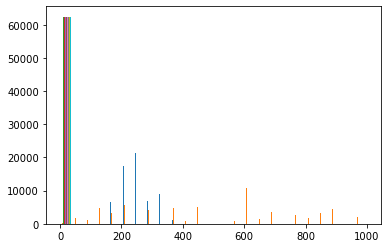

In [71]:
plt.hist(X_train, bins=25)
plt.show()

In [72]:
pt = PowerTransformer(copy=False)

def power_x(X):
    for i in X.columns:
        X[i] = pt.fit_transform(np.array(X[i]).reshape(-1,1))[:,0]
    return X

In [73]:
pt = PowerTransformer(copy=False)

def power_valid(X):
    for i in X.columns:
        X[i] = pt.transform(np.array(X[i]).reshape(-1,1))[:,0]
    return X

In [74]:
power_x(X_train)

,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional,cat_encode,vid_encode,age_encode
77139,0.45,0.50,-0.84,0.84,-0.66,1.00,-0.50,1.11,1.50,0.87
5736,-0.42,-1.34,1.19,-1.19,-0.66,-1.00,2.01,-1.27,-1.12,-0.95
76489,0.25,-1.96,-0.84,0.84,-0.66,1.00,-0.50,-0.88,-2.15,-1.37
40929,-0.19,-0.62,1.19,-1.19,-0.66,1.00,-0.50,-0.88,-0.08,0.87
43110,-0.92,-0.44,-0.84,0.84,1.52,-1.00,-0.50,1.11,1.50,-0.95
...,...,...,...,...,...,...,...,...,...,...
23809,0.45,0.50,-0.84,0.84,-0.66,-1.00,2.01,1.11,1.50,-0.95
53355,-0.19,-0.99,-0.84,0.84,-0.66,-1.00,2.01,1.11,-2.15,0.87
62127,-0.42,1.01,-0.84,0.84,1.52,-1.00,-0.50,1.11,1.50,0.87
77843,-1.45,1.19,-0.84,0.84,-0.66,1.00,-0.50,-1.83,-2.15,0.87


In [75]:
power_valid(X_valid)

,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional,cat_encode,vid_encode,age_encode
48644,"2,030,305,377.99","288,599,609,066.71",-1.75,6.13,-1.75,-1.75,6.13,-0.72,-1.44,0.87
81344,"1,405,050,472.86","2,629,534.59",6.13,-1.75,6.13,-1.75,-1.75,-0.72,-1.63,-0.95
36704,"753,278,809.79","257,550,447.86",-1.75,6.13,-1.75,-1.75,6.13,-0.88,-1.29,-0.95
4379,"4,502,553,379.58","119,107,022,993.40",-1.75,6.13,-1.75,6.13,-1.75,-0.72,-1.44,0.87
5974,"3,885,884,421.28","34,278,862,833.29",-1.75,6.13,6.13,-1.75,-1.75,-0.88,-1.44,-0.95
...,...,...,...,...,...,...,...,...,...,...
24703,"2,411,990,364.15","1,994,814,716.10",-1.75,6.13,-1.75,-1.75,6.13,-0.72,-1.24,0.87
72990,"2,411,990,364.15","1,994,814,716.10",6.13,-1.75,-1.75,6.13,-1.75,-0.72,-1.24,0.87
6493,"2,030,305,377.99","422,505,538.68",6.13,-1.75,-1.75,6.13,-1.75,-1.36,-1.63,-1.37
56514,"2,030,305,377.99","349,994,271,783.04",-1.75,6.13,-1.75,6.13,-1.75,-0.72,-1.24,-1.37


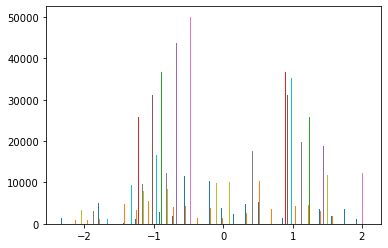

In [76]:
plt.hist(X_train, bins=25)
plt.show()

#### Scaling the target variable too using power transform

In [77]:
y_train = pt.fit_transform(np.array(y_train).reshape(-1,1))[:,0]
y_train

array([ 0.22884881,  0.06626675,  1.4998173 , ..., -0.25387959,
       -0.02588904,  0.27040815])

In [78]:
y_valid = pt.transform(np.array(y_valid).reshape(-1,1))[:,0]
y_valid

array([-0.61672887, -0.42236947, -0.01284436, ...,  1.06605171,
       -0.92288002, -0.59444028])

### Preparing for running ML algorithms

In [79]:
model = list()
resample = list()
r2score_train = list()
r2score_valid = list()
adjusted_r_squared_train = list()
adjusted_r_squared_valid = list()

### Running Linear Regression, Decision Trees and Random Forest on the dataset

In [80]:
model_LR = LinearRegression()
model_DT = DecisionTreeRegressor(random_state = 23)
model_RF = RandomForestRegressor(oob_score = True, random_state=23)

#### Hyperparameter Tuning parameters

In [81]:
# params_LR = {'C':np.logspace(-1, 5, 10), 'class_weight':[None,'balanced'], 'penalty':['l1','l2']}


params_DT = {
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200]
    # 'criterion': ["entropy"]
} 


# Not able to run hyperparameters for Random Forest because of crashing, hence choosing limited parameters
params_RF = {    
    'n_estimators': [50],
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200]
    # 'criterion': ["entropy"]
}

#### Without hyperparameter tuning

In [82]:
def model_fit_evaluation1(model_model, X_train, y_train, X_valid, y_valid, algo=None, sampling=None):
    
    lr = model_LR.fit(X_train, y_train)

    # Train set prediction
    y_train_pred = lr.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)

    N_train = len(X_train)
    p_train = len(X_train.columns)
    a_train = (1-r2_train)
    b_train = (N_train-1) / (N_train-p_train-1)
    adj_rsquared_train = (1 - (a_train * b_train))

    # Test set prediction    
    y_valid_pred = lr.predict(X_valid)
    r2_valid = r2_score(y_valid, y_valid_pred)

    N_valid = len(X_valid)
    p_valid = len(X_valid.columns)
    a_Valid = (1-r2_valid)
    b_valid = (N_valid-1) / (N_valid-p_valid-1)
    adj_rsquared_valid = (1 - (a_Valid * b_valid))
    
    print('R-Squared_train')
    print('='*60)
    print(r2_train,"\n")
    print('R-Squared_valid')
    print('='*60)
    print(r2_valid,"\n")    
    print('Adjusted R-Squared_train')
    print('='*60)
    print(adj_rsquared_train,"\n")
    print('Adjusted R-Squared_valid')
    print('='*60)
    print(adj_rsquared_valid,"\n")    
    
    model.append(algo)
    resample.append(sampling)
    r2score_train.append(r2_train)
    r2score_valid.append(r2_valid)
    adjusted_r_squared_train.append(adj_rsquared_train) 
    adjusted_r_squared_valid.append(adj_rsquared_valid) 

#### With hyperparameter tuning

In [83]:
def model_fit_evaluation2(model_model, params, X_train, y_train, X_valid, y_valid, algo=None, sampling=None):
    
    rc = RandomizedSearchCV(model_model, params, cv=5, scoring='r2', n_jobs=-1, verbose=1, random_state=23)
    rcv = rc.fit(X_train, y_train)
    # rcv = rc.best_estimator_
    
    print('\n')
    print('get params: ', rcv.get_params())
    print('best estimator : ', rcv.best_estimator_)
    print('best parameters: ', rcv.best_params_)
    print('best score: ', rcv.best_score_)
    print('\n')

    # Train set prediction
    y_train_pred = (rcv.best_estimator_).predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)

    N_train = len(X_train)
    p_train = len(X_train.columns)
    a_train = (1-r2_train)
    b_train = (N_train-1) / (N_train-p_train-1)
    adj_rsquared_train = (1 - (a_train * b_train))

    # Test set prediction    
    y_valid_pred = (rcv.best_estimator_).predict(X_valid)
    r2_valid = r2_score(y_valid, y_valid_pred)

    N_valid = len(X_valid)
    p_valid = len(X_valid.columns)
    a_valid = (1-r2_valid)
    b_valid = (N_valid-1) / (N_valid-p_valid-1)
    adj_rsquared_valid = (1 - (a_valid * b_valid))
    
    print('R-Squared_train')
    print('='*60)
    print(r2_train,"\n")
    print('R-Squared_valid')
    print('='*60)
    print(r2_valid,"\n")    
    print('Adjusted R-Squared_train')
    print('='*60)
    print(adj_rsquared_train,"\n")
    print('Adjusted R-Squared_valid')
    print('='*60)
    print(adj_rsquared_valid,"\n")   
    
    model.append(algo)
    resample.append(sampling)
    r2score_train.append(r2_train)
    r2score_valid.append(r2_valid)
    adjusted_r_squared_train.append(adj_rsquared_train) 
    adjusted_r_squared_valid.append(adj_rsquared_valid) 

#### Linear Regression without hyperparameter tuning

In [84]:
model_fit_evaluation1(model_LR, X_train, y_train, X_valid, y_valid, 'Linear Regression', 'actual')

R-Squared_train
0.2814898672335543 

R-Squared_valid
-2.6982413587409954e+20 

Adjusted R-Squared_train
0.2813747693364014 

Adjusted R-Squared_valid
-2.699250084808789e+20 



#### Decision Trees without hyperparameter tuning

In [85]:
model_fit_evaluation1(model_DT, X_train, y_train, X_valid, y_valid, 'Decision Tree', 'actual')

R-Squared_train
0.2814898672335543 

R-Squared_valid
-2.6982413587409954e+20 

Adjusted R-Squared_train
0.2813747693364014 

Adjusted R-Squared_valid
-2.699250084808789e+20 



#### Decision Trees with hyperparameter tuning

In [86]:
model_fit_evaluation2(model_DT, params_DT, X_train, y_train, X_valid, y_valid, 'Decision Tree', 'actual')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


get params:  {'cv': 5, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 23, 'estimator__splitter': 'best', 'estimator': DecisionTreeRegressor(random_state=23), 'n_iter': 10, 'n_jobs': -1, 'param_distributions': {'max_depth': [10, 20, 50, 100, 200], 'min_samples_leaf': [10, 20, 50, 100, 200], 'min_samples_split': [10, 20, 50, 100, 200]}, 'pre_dispatch': '2*n_jobs', 'random_state': 23, 'refit': True, 'return_train_score': False, 'scoring': 'r2', 'verbose': 1}
best estimator :  DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=100,
                      random

#### Random Forest without hyperparameter tuning

In [87]:
model_fit_evaluation1(model_RF, X_train, y_train, X_valid, y_valid, 'Random Forest', 'actual')

R-Squared_train
0.2814898672335543 

R-Squared_valid
-2.6982413587409954e+20 

Adjusted R-Squared_train
0.2813747693364014 

Adjusted R-Squared_valid
-2.699250084808789e+20 



#### Random Forest with hyperparameter tuning

In [88]:
model_fit_evaluation2(model_RF, params_RF, X_train, y_train, X_valid, y_valid, 'Random Forest', 'actual')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


get params:  {'cv': 5, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': True, 'estimator__random_state': 23, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(oob_score=True, random_state=23), 'n_iter': 10, 'n_jobs': -1, 'param_distributions': {'n_estimators': [50], 'max_depth': [10, 20, 50, 100, 200], 'min_samples_leaf': [10, 20, 50, 100, 200], 'min_samples_split': [10, 20, 50, 100, 200]}, 'pre_dispatch': '2*n_jobs', 'ran

### Model2 Comparision

In [89]:
eval_df2 = pd.DataFrame({'model': model, 'resample': resample, 'r2score_train': r2score_train, 'r2score_valid': r2score_valid, 'adjusted_r_squared_train': adjusted_r_squared_train, 'adjusted_r_squared_valid': adjusted_r_squared_valid})
eval_df2

,model,resample,r2score_train,r2score_valid,adjusted_r_squared_train,adjusted_r_squared_valid
0,Linear Regression,actual,0.28,"-269,824,135,874,099,544,064.00",0.28,"-269,925,008,480,878,886,912.00"
1,Decision Tree,actual,0.28,"-269,824,135,874,099,544,064.00",0.28,"-269,925,008,480,878,886,912.00"
2,Decision Tree,actual,0.38,0.22,0.38,0.22
3,Random Forest,actual,0.28,"-269,824,135,874,099,544,064.00",0.28,"-269,925,008,480,878,886,912.00"
4,Random Forest,actual,0.38,0.25,0.38,0.25


Random forest with HPT gives better score.

### Running trained dataset on test dataset and Analysis

In [90]:
X

,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional,cat_encode,vid_encode,age_encode
0,180,1000,0.00,1.00,0.00,1.00,0.00,0.15,0.16,0.57
1,330,714,1.00,0.00,0.00,1.00,0.00,0.15,0.16,0.15
2,180,138,0.00,1.00,0.00,1.00,0.00,0.28,0.19,0.57
3,220,613,0.00,1.00,0.00,1.00,0.00,0.20,0.16,0.57
4,220,613,0.00,1.00,0.00,0.00,1.00,0.20,0.16,0.57
...,...,...,...,...,...,...,...,...,...,...
89192,340,662,0.00,1.00,1.00,0.00,0.00,0.28,0.17,0.57
89193,240,892,0.00,1.00,1.00,0.00,0.00,0.28,0.17,0.27
89194,270,462,0.00,1.00,0.00,1.00,0.00,0.28,0.13,0.57
89195,230,819,0.00,1.00,0.00,0.00,1.00,0.32,0.19,0.27


In [91]:
test_encode

,category_id,video_id,age,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional
0,12,42,14,180,138,0.00,1.00,0.00,1.00,0.00
1,34,115,14,230,840,0.00,1.00,0.00,1.00,0.00
2,8,110,44,280,628,1.00,0.00,0.00,0.00,1.00
3,16,137,18,270,462,0.00,1.00,0.00,1.00,0.00
4,34,96,47,230,840,1.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
11116,25,140,21,240,317,0.00,1.00,0.00,1.00,0.00
11117,8,100,19,280,628,1.00,0.00,0.00,1.00,0.00
11118,16,98,22,270,462,0.00,1.00,0.00,1.00,0.00
11119,8,16,33,280,628,0.00,1.00,1.00,0.00,0.00


#### Since test dataset has to be matched with train data, lets encode the columns

In [92]:
X_test = test_encode.copy()

In [93]:
pt = PowerTransformer(copy=False)
# pt.fit_transform(X)
power_x(X)

,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional,cat_encode,vid_encode,age_encode
0,-1.74,1.67,-0.84,0.84,-0.66,1.00,-0.50,-1.27,-0.02,0.86
1,1.57,0.80,1.19,-1.19,-0.66,1.00,-0.50,-1.27,-0.02,-1.38
2,-1.74,-1.44,-0.84,0.84,-0.66,1.00,-0.50,0.37,1.51,0.86
3,-0.67,0.47,-0.84,0.84,-0.66,1.00,-0.50,-0.88,-0.07,0.86
4,-0.67,0.47,-0.84,0.84,-0.66,-1.00,2.01,-0.88,-0.07,0.86
...,...,...,...,...,...,...,...,...,...,...
89192,1.74,0.63,-0.84,0.84,1.52,-1.00,-0.50,0.37,0.60,0.86
89193,-0.20,1.35,-0.84,0.84,1.52,-1.00,-0.50,0.37,0.60,-0.96
89194,0.45,-0.05,-0.84,0.84,-0.66,1.00,-0.50,0.37,-1.11,0.86
89195,-0.43,1.13,-0.84,0.84,-0.66,-1.00,2.01,1.11,1.51,-0.96


In [94]:
pt.fit_transform(np.array(y).reshape(-1,1))[:,0]

array([ 1.06616917, -1.75225958,  1.09850907, ...,  0.9070211 ,
        0.22888331,  1.03399971])

In [95]:
# pt.transform(X_test)
power_valid(X_test)

,category_id,video_id,age,followers,views,x0_Female,x0_Male,x1_Other,x1_Student,x1_Working Professional
0,28.05,542.34,40.63,"17,357.58","9,189.46",-2.44,-2.17,-2.44,-2.17,-2.44
1,329.37,"5,943.45",40.63,"31,234.54","701,714.83",-2.44,-2.17,-2.44,-2.17,-2.44
2,10.10,"5,344.85",605.39,"50,070.25","348,630.07",-2.17,-2.44,-2.44,-2.44,-2.17
3,55.80,"9,031.01",73.71,"45,885.82","166,683.07",-2.44,-2.17,-2.44,-2.17,-2.44
4,329.37,"3,862.33",707.61,"31,234.54","701,714.83",-2.17,-2.44,-2.17,-2.44,-2.44
...,...,...,...,...,...,...,...,...,...,...
11116,159.71,"9,511.21",105.98,"34,591.00","67,446.67",-2.44,-2.17,-2.44,-2.17,-2.44
11117,10.10,"4,257.35",83.73,"50,070.25","348,630.07",-2.17,-2.44,-2.44,-2.17,-2.44
11118,55.80,"4,057.03",118.24,"45,885.82","166,683.07",-2.44,-2.17,-2.44,-2.17,-2.44
11119,10.10,55.80,306.99,"50,070.25","348,630.07",-2.44,-2.17,-2.17,-2.44,-2.44


In [96]:
y.shape

(89197,)

### Since Random forest with hyperparameters gave good r2score, we can run the same on test data set

In [97]:
rc = RandomizedSearchCV(model_RF, params_RF, cv=5, scoring='r2', n_jobs=-1, verbose=1, random_state=23)
rcv = rc.fit(X, y)
    
print('\n')
print('get params: ', rcv.get_params())
print('best estimator : ', rcv.best_estimator_)
print('best parameters: ', rcv.best_params_)
print('best score: ', rcv.best_score_)
print('\n')

# Train set prediction
y_train_pred = (rcv.best_estimator_).predict(X)
r2_train = r2_score(y, y_train_pred)

N_train = len(X)
p_train = len(X.columns)
a_train = (1-r2_train)
b_train = (N_train-1) / (N_train-p_train-1)
adj_rsquared_train = (1 - (a_train * b_train))

# Test set prediction    
y_test_pred = (rcv.best_estimator_).predict(X_test)
# r2_valid = r2_score(y_valid, y_valid_pred)

# N_valid = len(X_valid)
# p_valid = len(X_valid.columns)
# a_valid = (1-r2_valid)
# b_valid = (N_valid-1) / (N_valid-p_valid-1)
# adj_rsquared_valid = (1 - (a_valid * b_valid))

print('R-Squared_train')
print('='*60)
print(r2_train,"\n")
print('Adjusted R-Squared_train')
print('='*60)
print(adj_rsquared_train,"\n")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


get params:  {'cv': 5, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': True, 'estimator__random_state': 23, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(oob_score=True, random_state=23), 'n_iter': 10, 'n_jobs': -1, 'param_distributions': {'n_estimators': [50], 'max_depth': [10, 20, 50, 100, 200], 'min_samples_leaf': [10, 20, 50, 100, 200], 'min_samples_split': [10, 20, 50, 100, 200]}, 'pre_dispatch': '2*n_jobs', 'ran

### Predecting on Test dataset

In [98]:
#Final prediction
predictions = y_test_pred

#set the output as a dataframe and convert to csv file named submission.csv
submission = pd.DataFrame({ 'row_id' : df_test['row_id'], 'engagement_score': predictions })
submission.shape

(11121, 2)

In [99]:
submission

,row_id,engagement_score
0,89198,2.98
1,89199,2.98
2,89200,2.98
3,89201,2.98
4,89202,2.98
...,...,...
11116,100314,2.98
11117,100315,2.98
11118,100316,2.98
11119,100317,2.98


In [100]:
# submission.to_csv(r'C:\Users\getch\Documents\submission.csv', index = False)

Difference between Approach1 and Approach2:
In Approach 1, variables except for object column were considered as it is. One hot encoding was considered for object column for both approaches 1 and 2.
In Approach 2, the numerical columns were converted into bins using the frequency encoding approach and also power transformer scaling was considered to reduce skewness.

Since r2score was better for first approach, I am considering submission file of Approach1.